In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train.astype(float)/255, x_test.astype(float)/255

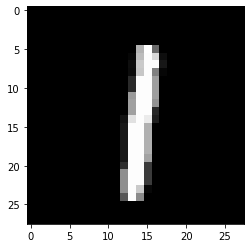

In [4]:
plt.imshow(x_train[40], cmap="gray")

In [5]:
from tensorflow.keras.layers import Dense, Input, Reshape
from tensorflow.keras.models import Model

In [7]:
in_layer_1 = Input(shape=(28, 28))
l1 = Reshape(target_shape=(784,))(in_layer_1)
l2 = Dense(units=100, activation="relu")(l1)
l3 = Dense(units=30, activation="relu")(l2)

in_layer_2 = Input(shape=(30,))
l4 = Dense(units=100, activation="relu")(in_layer_2)
l5 = Dense(units=784, activation="relu")(l4)
out_layer = Reshape(target_shape=(28, 28))(l5)

In [8]:
encoder = Model(in_layer_1, l3)
decoder = Model(in_layer_2, out_layer)


In [9]:
in_layer = Input(shape=(28, 28))
encoded = encoder(in_layer)
decoded = decoder(encoded)

model = Model(in_layer, decoded)

model.compile(optimiser="adam", loss="mse")

In [10]:
model.fit(x_train, x_train, batch_size=200, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0389
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0262
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0227
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0210
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0200
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0193
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0187
Epoch 8/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0182
Epoch 9/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0179
Epoch 10/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0175


In [11]:
gen = model.predict(x_test[:10])

In [12]:
gen.shape

(10, 28, 28)

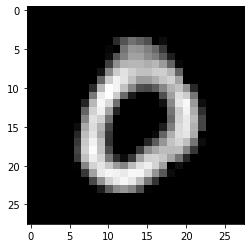

In [23]:
plt.imshow(gen[3], cmap="gray")

In [14]:
model.layers

In [17]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
model (Model)                (None, 30)                81530     
_________________________________________________________________
model_1 (Model)              (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_encoded = encoder.predict(x_test[:1000])

In [22]:
X_decoded = decoder.predict(X_encoded)

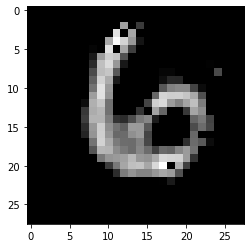

In [25]:
plt.imshow(X_decoded[100], cmap="gray")